<a href="https://colab.research.google.com/github/nptikiran/Python-program/blob/main/EDA_Retail_GripTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis - Retail**
(Level - Beginner)

**Author :- Kiran Malwe**

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

● Beginner Level - Create dashboards. Screen-record along with your
audio explaining the charts and interpretations.
● Task submission:
1. Create the dashboards and/or storyboard and record it
2. Upload the recording either on YouTube or LinkedIn
3. Create a LinkedIn post as suggested.

**Import Libraries**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

**Import Datasets**

In [49]:
data = pd.read_csv('/content/SampleSuperstore (1).csv')

In [50]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Data Preprocessing**

In [51]:
data.shape

(9994, 13)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


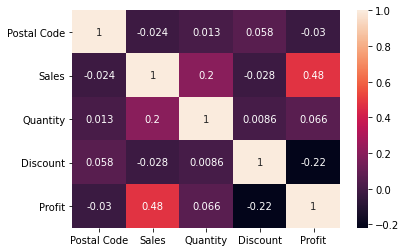

In [53]:
sn.heatmap(data.corr(), annot=True)

There is no strong correlation.

Finding Unique values in each column

In [54]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [55]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [56]:
data.Segment.value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [57]:
data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

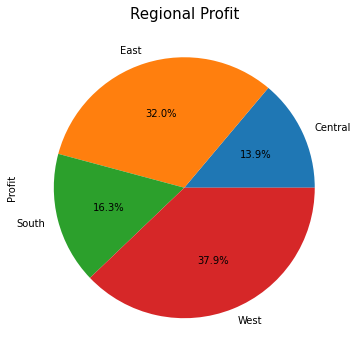

In [59]:
data.groupby('Region').Profit.sum().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',)
plt.title('Regional Profit',Size=15);

Here we can see South and Central region need to be focused.

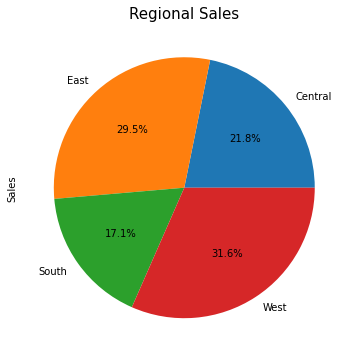

In [60]:
data.groupby('Region').Sales.sum().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',)
plt.title('Regional Sales',Size=15);

In above we can say that South and Central region need to be focused for the sale.

In [61]:
data.groupby(['Category']).Sales.sum().sort_values()

Category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: Sales, dtype: float64

Category technology has maximum sales

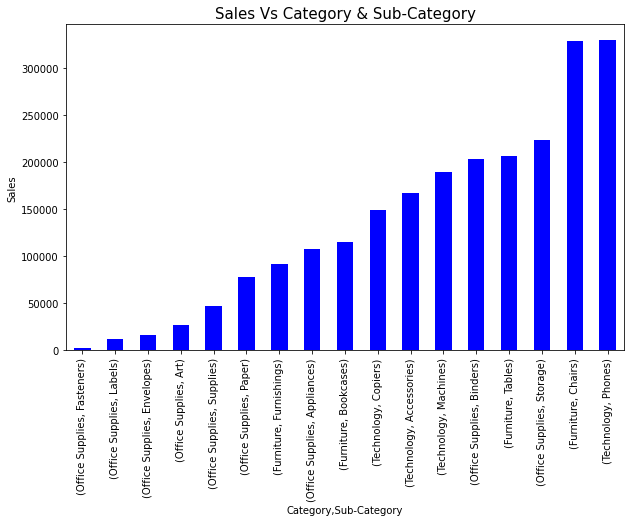

In [62]:
data.groupby(['Category','Sub-Category']).Sales.sum().sort_values().plot(kind='bar',cmap='winter',figsize=(10,6))   
plt.title('Sales Vs Category & Sub-Category',size=15)
plt.ylabel('Sales');         

In above chart it shows Office Supplies is in bottom 5 which need to be improve the sale in this category and it's subcategory.

Category         Sub-Category
Furniture        Tables         -17725.4811
                 Bookcases       -3472.5560
Office Supplies  Supplies        -1189.0995
                 Fasteners         949.5182
Technology       Machines         3384.7569
Office Supplies  Labels           5546.2540
                 Art              6527.7870
                 Envelopes        6964.1767
Furniture        Furnishings     13059.1436
Office Supplies  Appliances      18138.0054
                 Storage         21278.8264
Furniture        Chairs          26590.1663
Office Supplies  Binders         30221.7633
                 Paper           34053.5693
Technology       Accessories     41936.6357
                 Phones          44515.7306
                 Copiers         55617.8249
Name: Profit, dtype: float64


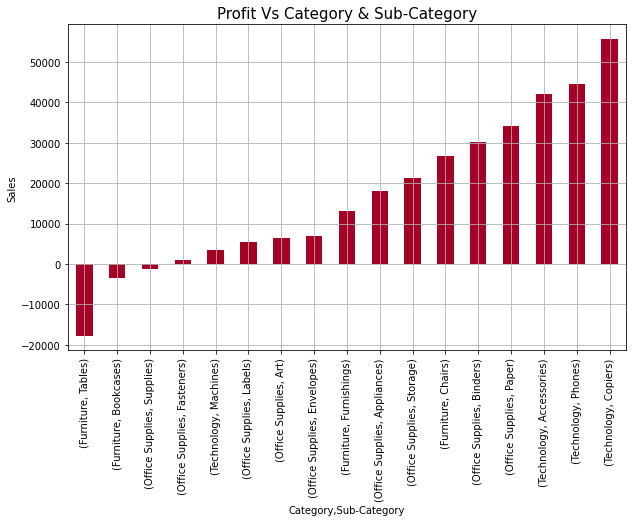

In [63]:
print(data.groupby(['Category','Sub-Category']).Profit.sum().sort_values())
data.groupby(['Category','Sub-Category']).Profit.sum().sort_values().plot(kind='bar',cmap='RdYlBu',figsize=(10,6))
plt.grid()
plt.ylabel('Sales')
plt.title('Profit Vs Category & Sub-Category',Size=15);

In case of category-Furniture and Office Supplies has loss in sub categories table, Bookcases ans Supplies where need to be analyse and take actions.


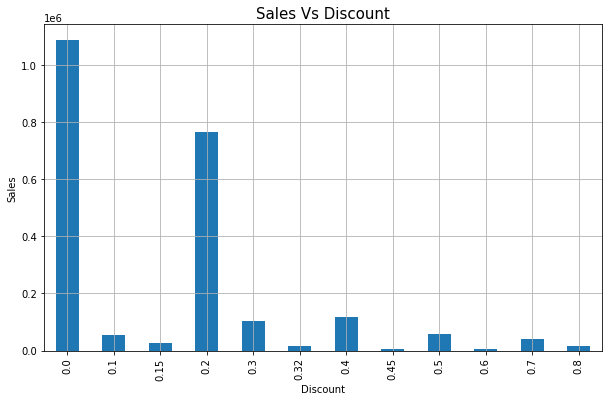

In [73]:
data.groupby('Discount').Sales.sum().plot(kind='bar',figsize=(10,6))
plt.title('Sales Vs Discount',Size=15)
plt.ylabel('Sales')
plt.grid();

Here we can see that there is no affect discount on sales. With out discounted items has more sale than the discount items.

In [82]:
a= data.groupby('Sub-Category')['Discount'].count()
a

Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Discount, dtype: int64

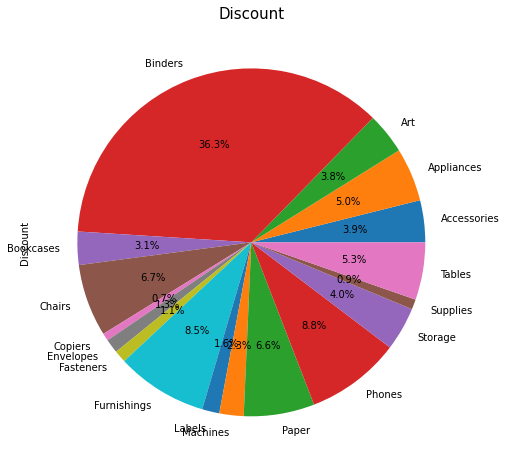

In [95]:
data.groupby('Sub-Category').Discount.sum().plot(kind='pie',figsize=(8,8),autopct="%1.1f%%")
plt.title('Discount',Size=15);

In [92]:
data[['Discount','Sub-Category']].value_counts()

Discount  Sub-Category
0.00      Paper           857
0.20      Binders         573
0.00      Furnishings     571
          Storage         530
0.20      Paper           513
0.00      Art             498
          Accessories     471
0.20      Phones          469
0.70      Binders         380
0.00      Binders         337
0.20      Storage         316
0.00      Phones          311
0.20      Accessories     304
          Art             298
0.00      Appliances      271
0.20      Chairs          250
          Furnishings     248
0.00      Labels          239
0.80      Binders         233
0.30      Chairs          158
0.00      Envelopes       152
0.60      Furnishings     138
0.00      Chairs          133
          Fasteners       128
0.20      Labels          125
0.00      Supplies        117
0.20      Appliances      112
0.40      Phones          109
0.20      Envelopes       102
          Fasteners        89
0.10      Chairs           76
0.40      Tables           75
0.20      Supplie

Region   State               
Central  North Dakota               919.9100
East     West Virginia             1209.8240
         Maine                     1270.5300
Central  South Dakota              1315.5600
West     Wyoming                   1603.1360
East     District of Columbia      2865.0200
Central  Kansas                    2914.3100
West     Idaho                     4382.4860
Central  Iowa                      4579.7600
West     New Mexico                4783.5220
         Montana                   5589.3520
East     New Hampshire             7292.5240
Central  Nebraska                  7464.9300
South    South Carolina            8481.7100
East     Vermont                   8929.3700
South    Louisiana                 9217.0300
         Mississippi              10771.3400
West     Utah                     11220.0560
South    Arkansas                 11678.1300
East     Connecticut              13384.3570
West     Nevada                   16729.1020
         Oregon          

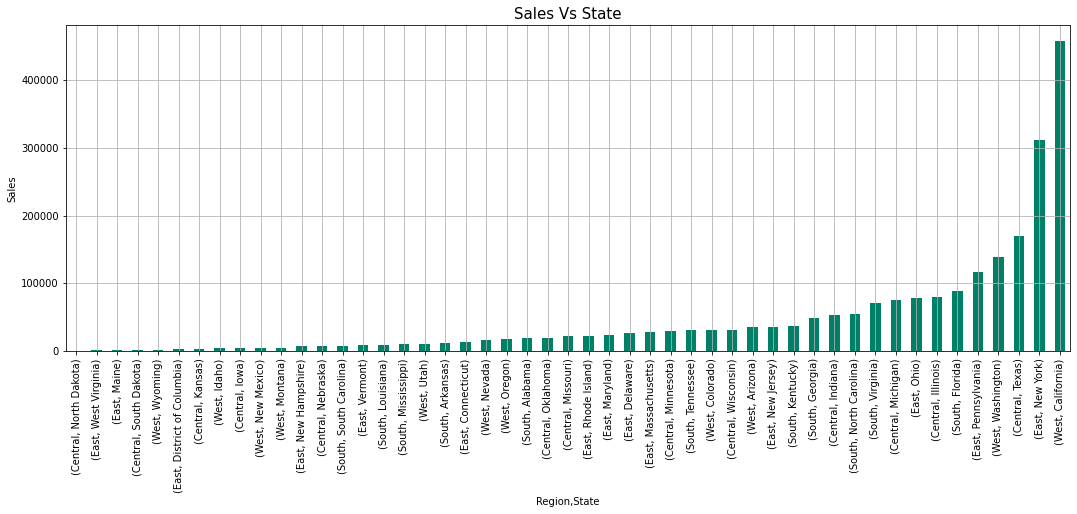

In [66]:
print(data.groupby(['Region','State']).Sales.sum().sort_values())
data.groupby(['Region','State']).Sales.sum().sort_values().plot(kind='bar',cmap='summer',figsize=(18,6))
plt.title('Sales Vs State',Size=15)
plt.ylabel('Sales')
plt.grid();

There are some states like North Dakota, Virginia,Maine etc. which has to be look after to increase the sales.

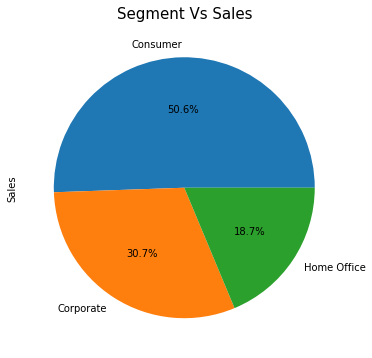

In [67]:
data.groupby('Segment').Sales.sum().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',)
plt.title('Segment Vs Sales',Size=15);

Sales at home office segment need to be improve.

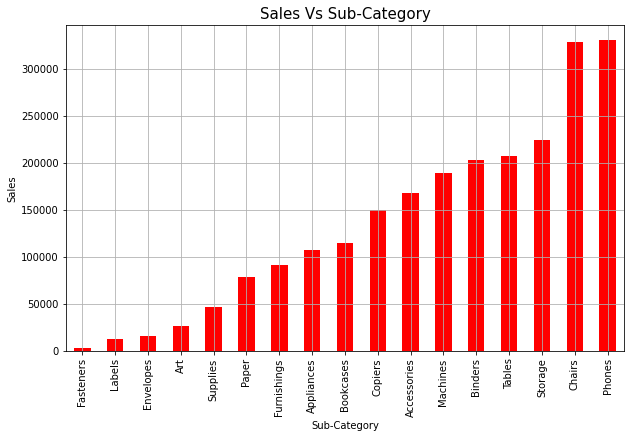

In [68]:
data.groupby('Sub-Category').Sales.sum().sort_values().plot(kind='bar',cmap='autumn',figsize=(10,6))
plt.title('Sales Vs Sub-Category',Size=15)
plt.ylabel('Sales')
plt.grid();

Items like Fastners, Labels, Envelopes etc. are the items has less sale.

In [69]:
data.groupby('Quantity').Profit.sum().sort_values()

Quantity
12     1185.0660
10     2044.1570
14     2724.0038
11     4293.3671
13     6348.9010
1      7440.4801
6     10325.4678
8     10856.7960
9     17687.8908
7     34286.9730
2     38448.4088
4     44223.3908
5     49516.5945
3     57015.5250
Name: Profit, dtype: float64

Profit don't depend on Quantity to be sold.

**Analysis**

from above points can be noted that:-

*   South region is weak for sales
*   Office supplies has less Sales and Profit too
*   Furniture items like tables and Bookcase has loss
*   Segment wise Home office has very less sell.
*   State like North Dakota, Virginia, Maine, South Dakota has less sales of items. It's reason has to be find out and work on it.
*   In comparision of discount with Sales it observed that without discounted items has maximum sell thatn the discounted item. 20% discounted items has better sell than other discount.